## 15.6. Сверточные нейронные сети для распознавания образов; множественная классификация с набором данных MNIST

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline
sns.set(font_scale=2)

2023-03-24 22:21:18.856480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

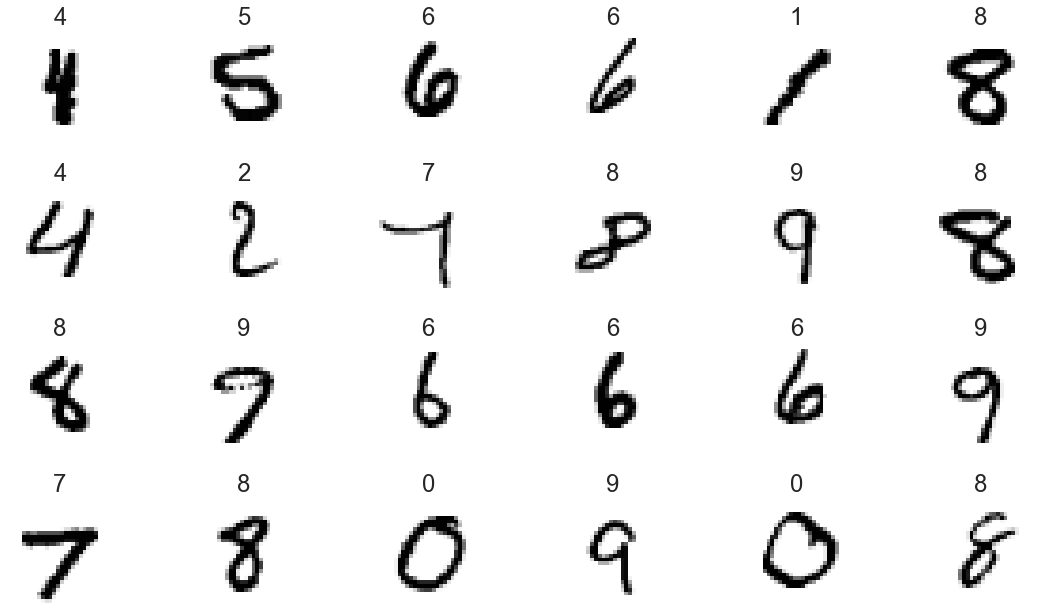

In [7]:
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

In [8]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape

(10000, 28, 28, 1)

In [10]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [14]:
cnn = Sequential()

In [15]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

In [16]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [18]:
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))

In [19]:
cnn.add(Dense(units=10, activation='softmax'))

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

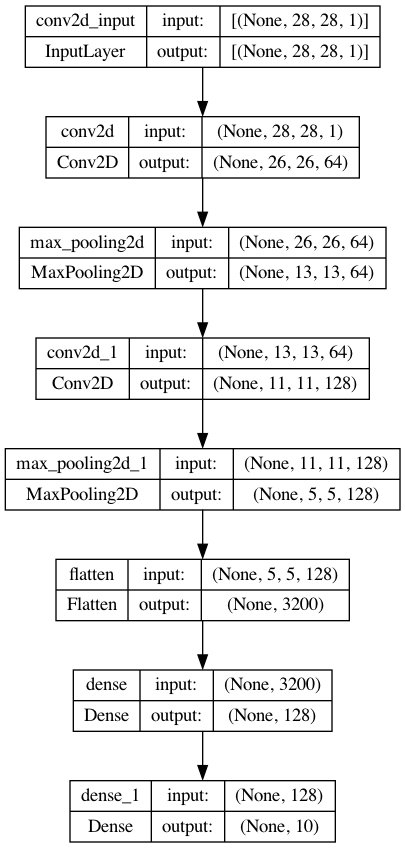

In [35]:
plot_model(cnn, to_file='convnet.png', show_shapes=True,
show_layer_names=True)
#Image(filename='/Users/vahmers/Downloads/convnet.png')

In [22]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 85s 99ms/step - loss: 0.1468 - accuracy: 0.9562 - val_loss: 0.0583 - val_accuracy: 0.9855
Epoch 2/5
844/844 [==============================] - 86s 102ms/step - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0384 - val_accuracy: 0.9885
Epoch 3/5
844/844 [==============================] - 85s 101ms/step - loss: 0.0291 - accuracy: 0.9905 - val_loss: 0.0349 - val_accuracy: 0.9903
Epoch 4/5
844/844 [==============================] - 88s 105ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0349 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 88s 105ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0337 - val_accuracy: 0.9913


In [24]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0349 - accuracy: 0.9891


In [25]:
predictions = cnn.predict(X_test)

313/313 [==============================] - 4s 13ms/step


In [26]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [27]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000440%
1: 0.0000000379%
2: 0.0000001676%
3: 0.0000277009%
4: 0.0000000000%
5: 0.0000000003%
6: 0.0000000000%
7: 99.9999701977%
8: 0.0000000183%
9: 0.0000001658%


In [28]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))

In [29]:
len(incorrect_predictions)

109

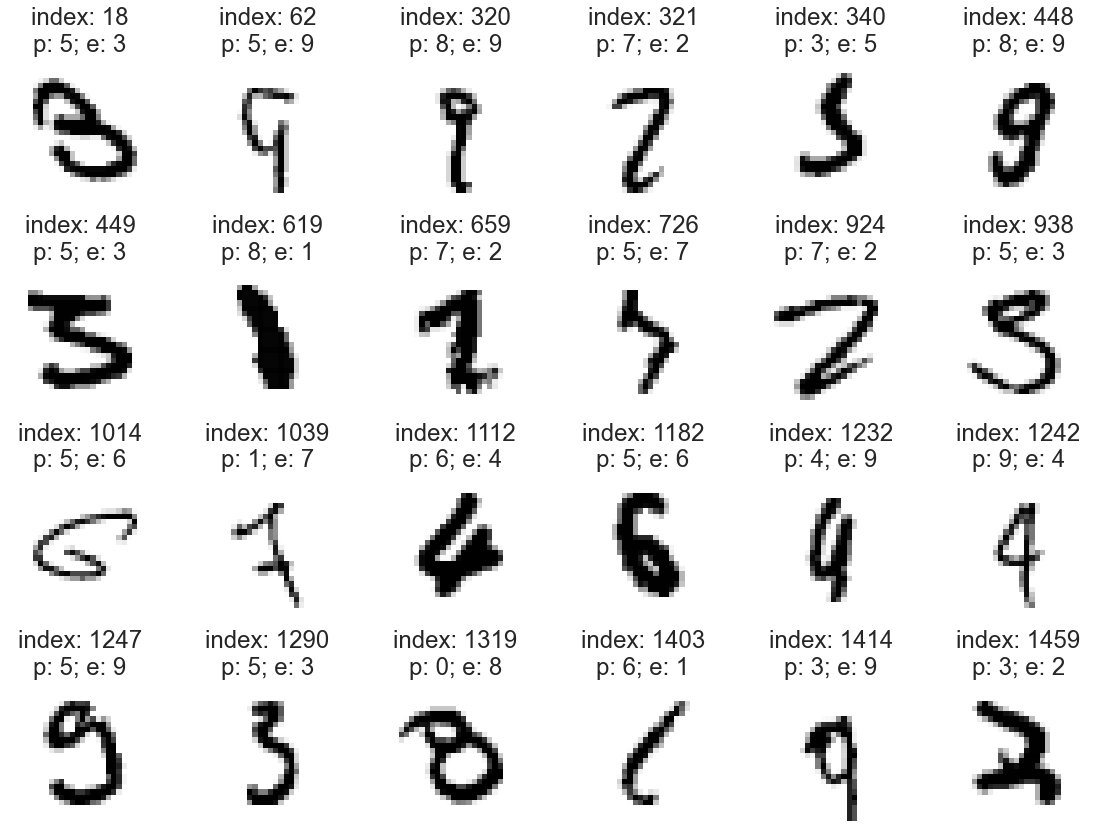

In [30]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))
for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [31]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [32]:
display_probabilities(predictions[18])

0: 0.0548086537%
1: 0.0000043221%
2: 0.0014228489%
3: 7.9484477639%
4: 0.0001954059%
5: 87.7010405064%
6: 0.0006131514%
7: 0.0155019647%
8: 4.2766626924%
9: 0.0012941554%


In [33]:
display_probabilities(predictions[924])

0: 0.0000023470%
1: 0.0000049204%
2: 34.6071362495%
3: 0.0078113124%
4: 0.0000000000%
5: 0.0000000005%
6: 0.0000000000%
7: 65.3847098351%
8: 0.0003446115%
9: 0.0000000209%


In [34]:
cnn.save('mnist_cnn.h5')

In [ ]:
#from tensorflow.keras.models import load_model
#cnn = load_model('mnist_cnn.h5')